# Trabajo practico Auto ML 2022
## Integrantes:
    * Genolet, Franco
    * Bossack, Federico
    * Trevisan, Marilina

# Introduccion:
Utilizaremos el trabajo realizado en las mentorias, comparando los modelos de AS utilizado vs un modelo AutoML  
La mentoria fue la mentoria N°7 Sobre [Análisis de Sentimiento en Noticias Financieras e Indicadores Financieros](https://sites.google.com/view/mentoras2022-diplodatos/an%C3%A1lisis-de-sentimiento-en-noticias-financieras-e-indicadores-financieros?authuser=0).

El dataframe utilizado trata sobre los principales indicadores financieros e intentamos mediante un modelo de clasificacion predecir si hubo una variación positiva o negativa respecto al año anterior. Es decir, para el problema de clasificacion la variable a predecir será "Class". La cual nos indica:
- En caso de 1: el precio de la acción aumenta de un año a otro.
- En caso de 0: el precio de la acción disminuye respecto al año anterior.


# Librerias y funciones

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import scipy.stats as st
import seaborn as sns
import math
# Regresion lineal
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, ConfusionMatrixDisplay, classification_report,precision_score, accuracy_score, recall_score
# Regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
sns.set_context('talk')
# Regresion polinomial
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore") 

# Obtengo dataframe curado
Comenzamons con el dataframe curado

In [2]:
#leer csv financial data
url_w_pca = 'https://drive.google.com/file/d/1HMtQwwo0YrTKkT-j0fW_5uQWsLE0XJqM/view?usp=sharing'
file_id=url_w_pca.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_financial_cure = pd.read_csv(dwn_url)

df_financial_cure

,Class,AnualPriceVariation,Revenue,Cost of Revenue,Operating Income,Interest Expense,Net Income,EPS,EBITDA,Total current liabilities,...,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018,pca_col_1,pca_col_2,pca_col_3,pca_col_4,pca_col_5
0,0,-9.323276,1.587093e+09,1.008666e+09,1.731999e+08,4.307216e+07,1.054469e+08,4.1900,2.854581e+08,7.543458e+08,...,1,0,0,0,0,1.003298,-2.297902,-1.014187,-0.172840,-0.516507
1,0,-25.512193,3.734148e+09,2.805625e+09,1.345959e+08,1.214869e+07,1.358227e+08,0.2396,2.456858e+08,1.639537e+09,...,1,0,0,0,0,1.370547,-0.283570,-1.261459,0.210887,-0.410241
2,1,33.118297,1.587093e+09,1.008666e+09,1.731999e+08,4.307216e+07,1.054469e+08,1.4700,2.854581e+08,7.543458e+08,...,1,0,0,0,0,1.595341,-0.540142,-1.517228,-0.043819,-0.533077
3,1,2.752291,1.587093e+09,1.008666e+09,7.372520e+08,4.307216e+07,2.494140e+08,4.6000,1.078550e+09,2.507452e+09,...,1,0,0,0,0,4.218791,-2.084354,-0.695768,-0.063101,-0.220501
4,1,12.897715,1.587093e+09,1.008666e+09,1.731999e+08,3.024000e+08,1.054469e+08,2.9000,2.854581e+08,5.423500e+09,...,1,0,0,0,0,3.725636,-0.149376,1.425857,-0.214152,-0.278700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,0,-90.962099,1.587093e+09,1.008666e+09,-3.755251e+06,1.105849e+07,-1.371648e+07,-0.0800,-3.757783e+06,5.675962e+07,...,0,0,0,0,1,-1.583732,0.020651,-0.704435,0.108795,2.484526
21960,0,-77.922077,5.560000e+05,1.008666e+09,-9.274000e+06,4.307216e+07,-9.170000e+06,-0.9200,-8.974000e+06,7.543458e+08,...,0,0,0,0,1,-1.940724,1.595030,-0.265430,0.213436,2.199194
21961,0,-17.834400,5.488438e+07,3.659379e+07,9.617636e+06,1.239170e+06,7.018114e+06,0.5200,1.006324e+07,3.913097e+07,...,0,0,0,0,1,-1.450130,-0.818953,-1.191149,-0.066871,1.845036
21962,0,-73.520000,1.587093e+09,1.008666e+09,-1.664863e+07,4.307216e+07,-1.664769e+07,-0.1800,-1.644192e+07,7.543458e+08,...,0,0,0,0,1,-1.235823,0.217089,-0.928596,-0.326821,1.566652


In [3]:
df_financial_cure.describe()

,Class,AnualPriceVariation,Revenue,Cost of Revenue,Operating Income,Interest Expense,Net Income,EPS,EBITDA,Total current liabilities,...,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018,pca_col_1,pca_col_2,pca_col_3,pca_col_4,pca_col_5
count,21964.000000,21964.000000,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,21964.000000,2.196400e+04,2.196400e+04,...,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04
mean,0.548443,6.244246,1.587093e+09,1.008666e+09,1.731999e+08,4.307216e+07,1.054469e+08,0.657324,2.854581e+08,7.543458e+08,...,0.172236,0.186533,0.216673,0.225460,0.199099,-2.588027e-17,1.164612e-16,-1.759858e-16,2.070421e-16,2.484506e-16
std,0.497659,45.199823,2.458163e+09,1.294729e+09,3.058808e+08,4.988600e+07,2.045184e+08,1.644016,4.640928e+08,1.202596e+09,...,0.377594,0.389545,0.411987,0.417894,0.399331,2.468837e+00,1.416148e+00,1.196057e+00,1.131073e+00,1.118327e+00
min,0.000000,-100.397220,6.480000e+04,3.020000e+02,-1.001830e+08,2.700000e+01,-1.416600e+08,-5.600000,-6.560100e+07,2.660578e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,-4.346455e+00,-4.035069e+00,-3.190418e+00,-2.351716e+00,-2.451738e+00
25%,0.000000,-19.638707,1.047595e+08,1.355620e+08,1.295629e+06,6.897250e+06,-1.053250e+06,-0.070000,1.061253e+07,5.495997e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.675270e+00,-9.515417e-01,-9.514691e-01,-4.195502e-01,-7.087480e-01
50%,1.000000,3.714962,7.283090e+08,1.008666e+09,7.108035e+07,4.307216e+07,4.378250e+07,0.657324,1.405120e+08,3.784575e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.614916e-01,-2.922311e-01,-2.092802e-01,-1.011097e-01,-2.575929e-01
75%,1.000000,27.041348,1.587093e+09,1.008666e+09,1.731999e+08,4.307216e+07,1.054469e+08,1.490000,2.854581e+08,7.543458e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.312725e-01,7.799055e-01,7.056715e-01,2.885088e-01,1.073107e-01
max,1.000000,295.454514,1.447681e+10,7.833600e+09,1.850500e+09,3.110000e+08,1.249000e+09,5.080000,2.810000e+09,7.725185e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.333175e+01,6.704783e+00,4.181625e+00,2.579737e+00,3.568048e+00


In [4]:
X = df_financial_cure.drop(['Class','AnualPriceVariation'],axis=1)
y = df_financial_cure['AnualPriceVariation']

train_size = int(len(X)*0.8)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)

#X_train = np.array(X_train.index.values)
#X_test = np.array(X_test.index.values)
y_train = np.array(y_train.index.values)
y_test = np.array(y_test.index.values)
print(f"-X_train: {X_train.shape}\n-X_test: {X_test.shape}\n-y_train: {y_train.shape}\n-y_test: {y_test.shape}")

-X_train: (17571, 35)
-X_test: (4393, 35)
-y_train: (17571,)
-y_test: (4393,)


# Clasificacion sin Auto ML

### Importación del dataset

In [5]:
df = df_financial_cure.copy()

### Exporación y análisis de los datos

In [6]:
df.head()

,Class,AnualPriceVariation,Revenue,Cost of Revenue,Operating Income,Interest Expense,Net Income,EPS,EBITDA,Total current liabilities,...,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018,pca_col_1,pca_col_2,pca_col_3,pca_col_4,pca_col_5
0,0,-9.323276,1.587093e+09,1.008666e+09,1.731999e+08,4.307216e+07,1.054469e+08,4.1900,2.854581e+08,7.543458e+08,...,1,0,0,0,0,1.003298,-2.297902,-1.014187,-0.172840,-0.516507
1,0,-25.512193,3.734148e+09,2.805625e+09,1.345959e+08,1.214869e+07,1.358227e+08,0.2396,2.456858e+08,1.639537e+09,...,1,0,0,0,0,1.370547,-0.283570,-1.261459,0.210887,-0.410241
2,1,33.118297,1.587093e+09,1.008666e+09,1.731999e+08,4.307216e+07,1.054469e+08,1.4700,2.854581e+08,7.543458e+08,...,1,0,0,0,0,1.595341,-0.540142,-1.517228,-0.043819,-0.533077
3,1,2.752291,1.587093e+09,1.008666e+09,7.372520e+08,4.307216e+07,2.494140e+08,4.6000,1.078550e+09,2.507452e+09,...,1,0,0,0,0,4.218791,-2.084354,-0.695768,-0.063101,-0.220501
4,1,12.897715,1.587093e+09,1.008666e+09,1.731999e+08,3.024000e+08,1.054469e+08,2.9000,2.854581e+08,5.423500e+09,...,1,0,0,0,0,3.725636,-0.149376,1.425857,-0.214152,-0.278700


In [7]:
df.shape

(21964, 37)

In [8]:
def status(data):
    data2=data
    # total de rows
    tot_rows=len(data2)
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values
    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows
    # total unique values
    d2['unique']=data2.nunique().values
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    return(d2)
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Class,0,0.0,9918,0.451557,2,int64
1,AnualPriceVariation,0,0.0,25,0.001138,21827,float64
2,Revenue,0,0.0,0,0.000000,17820,float64
3,Cost of Revenue,0,0.0,0,0.000000,14070,float64
4,Operating Income,0,0.0,32,0.001457,17274,float64
5,Interest Expense,0,0.0,0,0.000000,10259,float64
6,Net Income,0,0.0,41,0.001867,16648,float64
7,EPS,0,0.0,90,0.004098,2443,float64
8,EBITDA,0,0.0,9,0.000410,16976,float64
9,Total current liabilities,0,0.0,0,0.000000,16393,float64


Division del dataset en variables predictoras y variables a predecir:
- Para este notebook, se preparará un modelo de clasificación, por lo que la variable a predecir será *Class*

In [9]:
X = df.iloc[:,2:32]
print(X.columns.values)
y = df["Class"]

['Revenue' 'Cost of Revenue' 'Operating Income' 'Interest Expense'
 'Net Income' 'EPS' 'EBITDA' 'Total current liabilities'
 'Total liabilities' 'Operating Cash Flow' 'returnOnAssets'
 'Net Income per Share' 'Market Cap' 'EPS Diluted Growth'
 'Basic Materials' 'Communication Services' 'Consumer Cyclical'
 'Consumer Defensive' 'Energy' 'Financial Services' 'Healthcare'
 'Industrials' 'Real Estate' 'Technology' 'Utilities' 'Año_2014'
 'Año_2015' 'Año_2016' 'Año_2017' 'Año_2018']


In [10]:
X.columns.values
# X = X.drop(['Año_2014', 'Año_2015', 'Año_2016', 'Año_2017', 'Año_2018'], axis = 1)

array(['Revenue', 'Cost of Revenue', 'Operating Income',
       'Interest Expense', 'Net Income', 'EPS', 'EBITDA',
       'Total current liabilities', 'Total liabilities',
       'Operating Cash Flow', 'returnOnAssets', 'Net Income per Share',
       'Market Cap', 'EPS Diluted Growth', 'Basic Materials',
       'Communication Services', 'Consumer Cyclical',
       'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare',
       'Industrials', 'Real Estate', 'Technology', 'Utilities',
       'Año_2014', 'Año_2015', 'Año_2016', 'Año_2017', 'Año_2018'],
      dtype=object)

Se comprueba con otro código que el año influye en la precision del modelo. Razon por la cual, se comenta la celda de "drop".

In [11]:
# Escalamos
x_names = X.columns
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_orig = X.copy(deep=True)
X = scaler.fit_transform(X_orig)
X = pd.DataFrame(X, columns=x_names)
X

,Revenue,Cost of Revenue,Operating Income,Interest Expense,Net Income,EPS,EBITDA,Total current liabilities,Total liabilities,Operating Cash Flow,...,Healthcare,Industrials,Real Estate,Technology,Utilities,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018
0,0.109626,0.128761,0.140147,0.138496,0.177690,0.916667,0.122082,0.097337,0.103015,0.118250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.257937,0.358153,0.120357,0.039063,0.199533,0.546779,0.108251,0.211961,0.098357,0.242046,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.109626,0.128761,0.140147,0.138496,0.177690,0.661985,0.122082,0.097337,0.103015,0.118250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.109626,0.128761,0.429303,0.138496,0.281215,0.955056,0.397882,0.324349,0.387743,0.315202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.109626,0.128761,0.140147,0.972347,0.177690,0.795880,0.122082,0.701952,0.648872,0.118250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,0.109626,0.128761,0.049433,0.035558,0.092002,0.516854,0.021506,0.007005,0.009005,0.019598,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21960,0.000034,0.128761,0.046604,0.138496,0.095271,0.438202,0.019692,0.097337,0.000124,0.018574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21961,0.003787,0.004671,0.056288,0.003984,0.106912,0.573034,0.026312,0.004723,0.001489,0.021294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21962,0.109626,0.128761,0.042823,0.138496,0.089894,0.507491,0.017095,0.097337,0.103015,0.017575,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Entrenamiento y Test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17571, 30), (17571,), (4393, 30), (4393,))

### Primero validaremos con varios modelos para verificar cual puede ser que obtenga un mayor Accuracy

In [14]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 99.49%
Accuracy test Arbol de decisión: 63.42%
Random Forest
Accuracy train Random Forest: 99.49%
Accuracy test Random Forest: 70.91%
Regresión Logística
Accuracy train Regresión Logística: 68.69%
Accuracy test Regresión Logística: 68.72%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 72.82%
Accuracy test Perceptrón multicapa: 70.13%
XGBoost
Accuracy train XGBoost: 71.96%
Accuracy test XGBoost: 69.91%
Naive Bayes
Accuracy train Naive Bayes: 65.90%
Accuracy test Naive Bayes: 65.29%
SVM
Accuracy train SVM: 68.41%
Accuracy test SVM: 68.52%


In [15]:
models = pd.DataFrame({'Model':names, 'Score':accuracy_models})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.709083
3,Perceptrón multicapa,0.701343
4,XGBoost,0.699067
2,Regresión Logística,0.687230
6,SVM,0.685181
5,Naive Bayes,0.652857
0,Arbol de decisión,0.634191


### Como se puede observar en el cuadro anterior, el modelo que mejor "Test Score" tuvo fue Random Forest. A continuacion, ajustaremos parametros para validar si se puede mejorar la métrica analizada.

In [16]:
param_grid = {
             'max_depth'   : [3, 10, 20],
             'min_samples_leaf': [0.05, 0.1],
             'max_features': ['sqrt', 'log2'],
             'ccp_alpha': [0, 0.01]
            }

model = RandomForestClassifier(
            n_estimators = 100,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
        )
grid = GridSearchCV(
        estimator  = model,
        param_grid = param_grid,
        scoring    = 'roc_auc',
        cv         = 5, 
        refit      = False,
        verbose    = 0,
        return_train_score = True
       )

In [17]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=123),
             param_grid={'ccp_alpha': [0, 0.01], 'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0.05, 0.1]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [18]:
grid.best_params_

{'ccp_alpha': 0,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.05}

In [19]:
clfrandomForest = RandomForestClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clfrandomForest.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train de Random forest: %.2f%%" % (accuracy * 100.0))

test_predictions = clfrandomForest.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test de Random Forest: %.2f%%" % (accuracy * 100.0))
plt.show()

Accuracy train de Random forest: 68.11%
Accuracy test de Random Forest: 67.18%


In [20]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60      1995
           1       0.67      0.78      0.72      2398

    accuracy                           0.67      4393
   macro avg       0.67      0.66      0.66      4393
weighted avg       0.67      0.67      0.67      4393



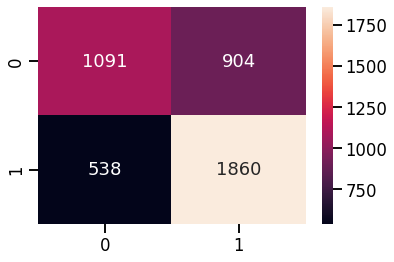

In [21]:
from sklearn.metrics import confusion_matrix,roc_curve

cm = confusion_matrix(y_test, test_predictions)
f = sns.heatmap(cm, annot=True, fmt='d')

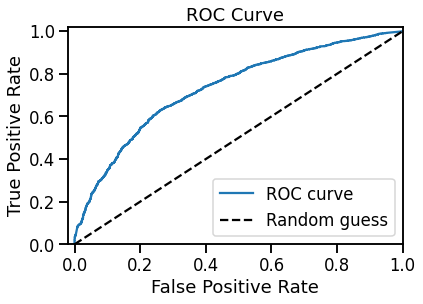

In [22]:
fpr, tpr, thresholds = roc_curve(y_test,clfrandomForest.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [23]:
roc_auc_score(y_test, test_predictions)

0.6612567699482234

## En conclusion, el mejor modelo es el Random Forest con una precision para el conjunto de validacion de 69,32%

# Clasificacion con autosklearn AutoML
Ahora realizaremos los mismo pasos con un modelo AutoML para comparar con que modelo tenemos mejores resultados

In [24]:
! pip install auto-sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 260 kB 49.8 MB/s 
     |████████████████████████████████| 4.4 MB 36.6 MB/s 
     |████████████████████████████████| 24.9 MB 41.3 MB/s 
     |████████████████████████████████| 4.9 MB 38.3 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=6fac7b8935c69aa6185f1372dd329d72d0fa2ca440ed0df1724de0e5bb04f578
  Stored in directory: /root/.cache/pip/wheels/c5/11/0e/aeac2cee929fa4388e528737b49deb2eea05486e6f80d61c1a
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=c2cbc5e43b813b7893766068ca49d25db47e25f7e975c207970c030659d1dbfb
  St

In [26]:
from autosklearn.classification import AutoSklearnClassifier
import sklearn.metrics

In [27]:
model = AutoSklearnClassifier(time_left_for_this_task=120, tmp_folder="/tmp/autosklearn_classification_example_tmp")

In [28]:
model.fit(x_train, y_train)

[WARNING] [2022-12-11 21:40:24,558:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2022-12-11 21:40:37,667:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2022-12-11 21:40:50,771:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=12, time_left_for_this_task=120,
                      tmp_folder='/tmp/autosklearn_classification_example_tmp')

In [29]:
predictions = model.predict(x_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.7006601411336216


Con el modulo AutoML con 2 minutos de entrenamiento se pudo mejorar un punto porcentual la precision del modelo (de 69% a 70%). Si bien la variacion porcentual de la métrica no fue significativa, todos los pasos previos para la obtención del modelo sin la utilización de la herramienta autoML (tales como búsqueda del mejor modelo, grid searchCV para ajustar hiperparármetros del modelo seleccionado, evaluación del mismo) se podrian haber ahorrado con la utilizacion de AutoML de SkLearn.

Intentaremos nuevamente pero con más tiempo de entrenamiento, esta vez con 20 minutos.

In [30]:
model2 = AutoSklearnClassifier(time_left_for_this_task=1200, tmp_folder="/tmp/autosklearn_classification_example_tmp")

In [31]:
model2.fit(x_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=120, time_left_for_this_task=1200,
                      tmp_folder='/tmp/autosklearn_classification_example_tmp')

In [32]:
predictions2 = model2.predict(x_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions2))

Accuracy score 0.7115866150694287


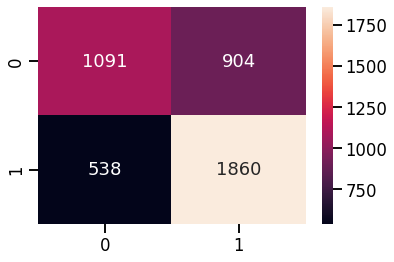

In [33]:
cm2 = confusion_matrix(y_test, predictions2)
f2 = sns.heatmap(cm, annot=True, fmt='d')

In [34]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1995
           1       0.73      0.74      0.74      2398

    accuracy                           0.71      4393
   macro avg       0.71      0.71      0.71      4393
weighted avg       0.71      0.71      0.71      4393



Podemos observar que todas las métricas mejoraron respecto a la versión anterior. El accuracy mejoró a 0.71, por lo que concluimos en que el autoML tuvo un mejor balance de la precision del modelo para clasificar la varibale binaria.

In [35]:
print(model2.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
20           1             0.06            mlp  0.294361  84.445227
10           2             0.22  random_forest  0.296775  17.176538
18           3             0.08            mlp  0.297810   5.204042
17           4             0.02            mlp  0.298155  20.902242
2            5             0.12  random_forest  0.298500  21.881399
4            6             0.14    extra_trees  0.300914  25.938832
22           7             0.08    extra_trees  0.301776  17.115834
23           8             0.08            mlp  0.315054  45.604602
15           9             0.04            qda  0.316951   1.219222
7           10             0.14            lda  0.323159   1.428650
11          11             0.02    gaussian_nb  0.327298  12.151428


El metodo utilizado fue un gradient boosting.